In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

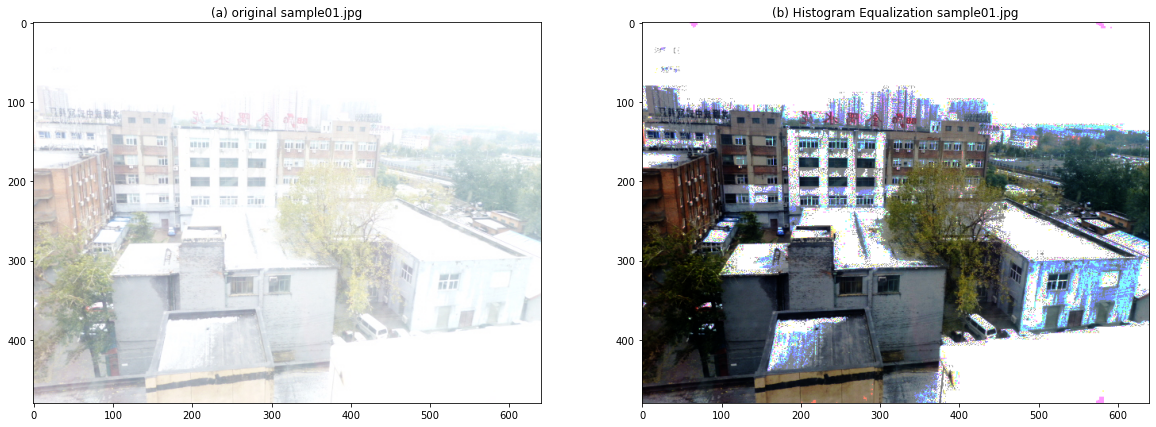

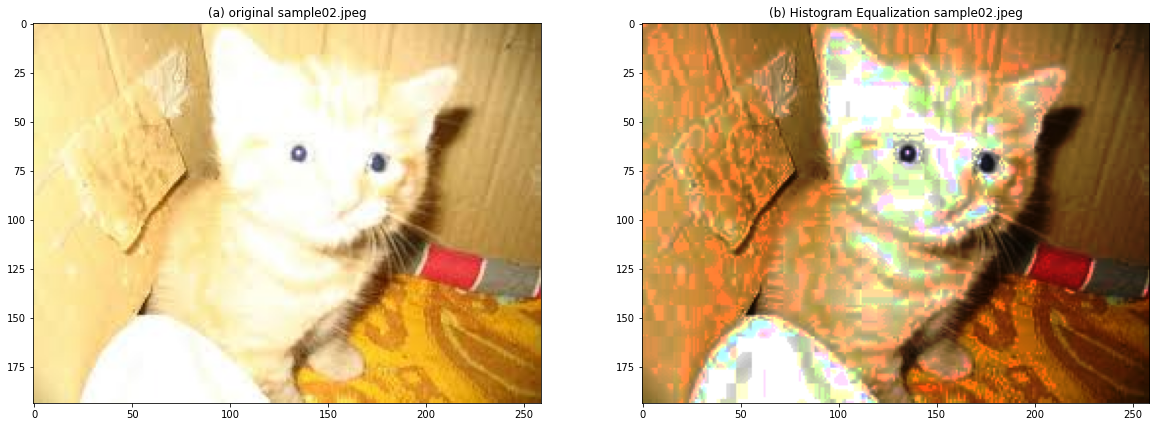

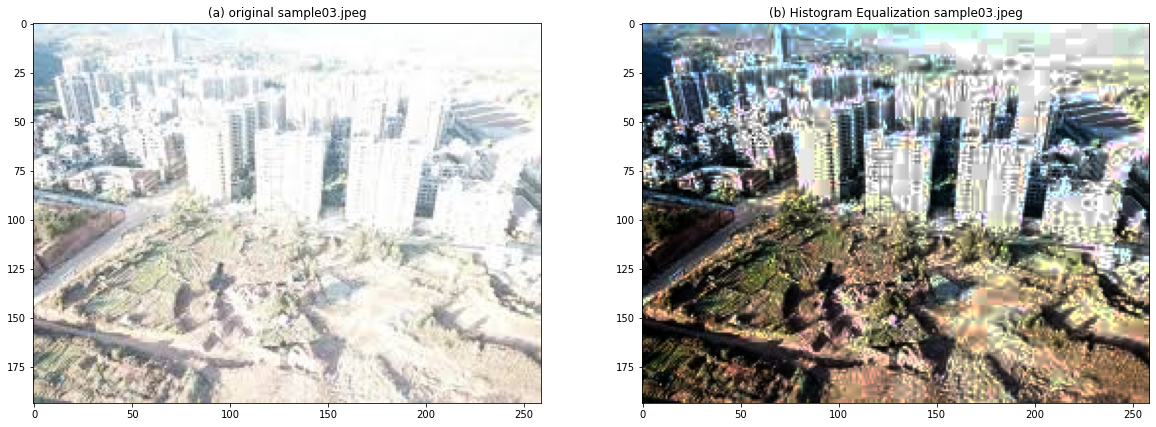

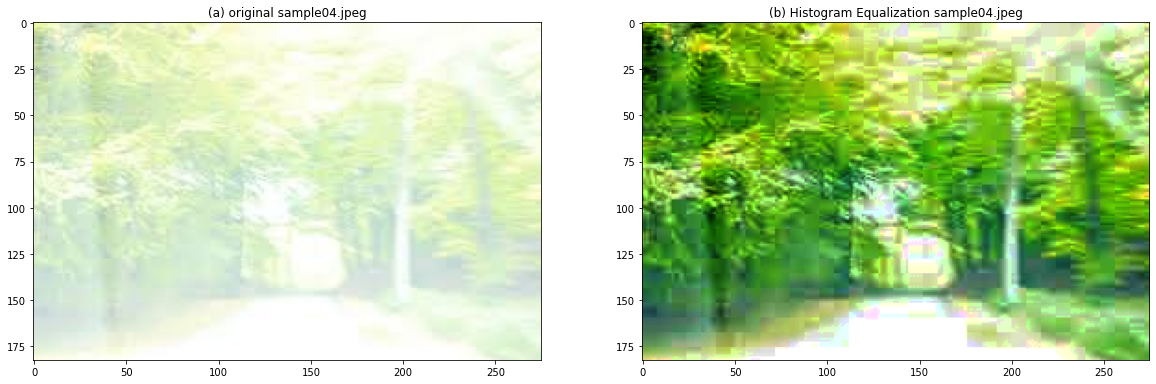

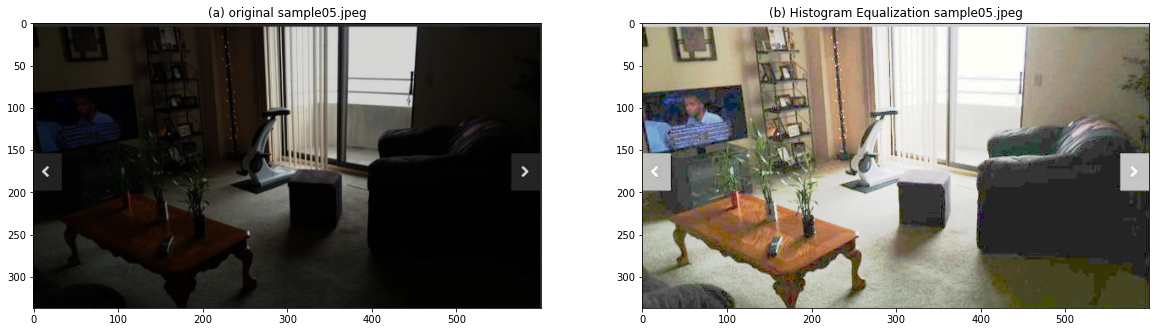

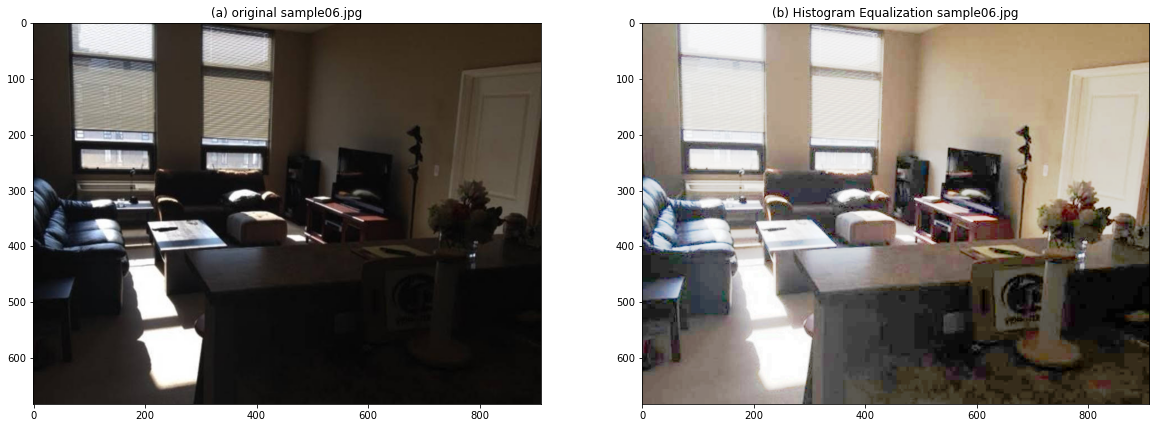

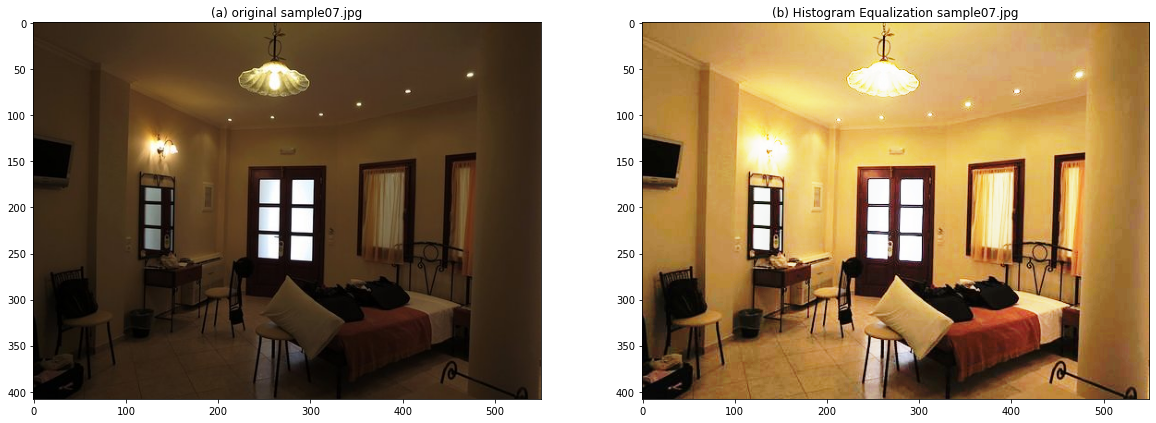

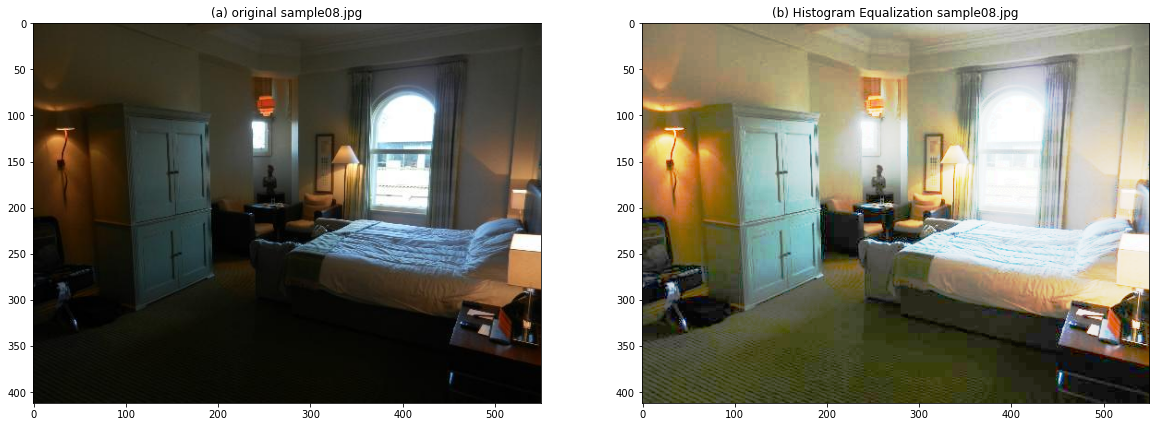

In [11]:
# Read the sample image
base_path = 'sample_images/'
save_path = 'HE_Images/'
imgList = ["sample01.jpg", "sample02.jpeg", "sample03.jpeg", "sample04.jpeg", "sample05.jpeg", "sample06.jpg", "sample07.jpg", "sample08.jpg"]
for imgPath in imgList:
    # 1. HE
    img = cv2.imread(base_path+imgPath)

    # calculate histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    
    # calculate cdf
    cdf = np.cumsum(hist/np.sum(hist))
    
    # apply round operation to calculate the mapping
    mapping = np.round((256-1)*cdf)
    mapping = mapping.astype("uint8")
    
    # transform image
    img_he = np.array([mapping[i] for i in img])
    
    # 2. plot image before&after HE
    plt.figure(figsize=(20, 10))

    plt.subplot(1,2,1)
    plt.title("(a) original " + imgPath)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(1,2,2)
    plt.title("(b) Histogram Equalization " + imgPath)
    plt.imshow(cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB))

    plt.savefig(save_path+imgPath)
    plt.show()

